In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
datos = pd.read_csv("C:/Users/juanm/Downloads/data-modelo.csv")
datos

,id_uta,departamento_nombre,provincia_nombre,id_estacion,anio,semana,cantidad_casos,poblacion,temperatura_minima_lag1,temperatura_minima_lag2,...,tesion_vapor_media_lag3,radiacion_global_lag1,radiacion_global_lag2,radiacion_global_lag3,heliofania_efectiva_lag1,heliofania_efectiva_lag2,heliofania_efectiva_lag3,heliofania_relativa_lag1,heliofania_relativa_lag2,heliofania_relativa_lag3
0,2008,comuna 8,ciudad de buenos aires,A872810,2020,7,1.0,228953,21.042857,21.042857,...,23.412006,17.392447,17.392447,19.425206,6.938757,6.938757,7.937013,51.142857,51.142857,56.928571
1,2008,comuna 8,ciudad de buenos aires,A872810,2020,8,2.0,228953,17.695502,21.042857,...,24.017211,19.981907,17.392447,17.392447,7.841595,6.938757,6.938757,58.714286,51.142857,51.142857
2,2008,comuna 8,ciudad de buenos aires,A872810,2020,8,3.0,228953,14.612961,17.695502,...,24.017211,17.812327,19.981907,17.392447,6.905201,7.841595,6.938757,52.624060,58.714286,51.142857
3,2008,comuna 8,ciudad de buenos aires,A872810,2020,8,1.0,228953,14.612961,14.612961,...,18.818262,17.812327,17.812327,19.981907,6.905201,6.905201,7.841595,52.624060,52.624060,58.714286
4,2008,comuna 8,ciudad de buenos aires,A872810,2020,8,4.0,228953,14.612961,14.612961,...,15.009032,17.812327,17.812327,17.812327,6.905201,6.905201,6.905201,52.624060,52.624060,52.624060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12514,90091,simoca,tucuman,NH0444,2025,17,1.0,35572,12.766667,23.250000,...,27.700000,10.935289,14.736691,14.736691,3.366667,5.800000,5.800000,28.760000,48.500000,48.500000
12515,90091,simoca,tucuman,NH0444,2025,19,1.0,35572,15.957143,12.766667,...,27.700000,6.688571,10.935289,14.736691,1.428571,3.366667,5.800000,12.857143,28.760000,48.500000
12516,90091,simoca,tucuman,NH0444,2025,20,1.0,35572,17.342857,15.957143,...,14.916667,9.735714,6.688571,10.935289,3.614286,1.428571,3.366667,33.571429,12.857143,28.760000
12517,90098,tafi del valle,tucuman,NH0444,2023,12,1.0,18114,23.250000,19.600000,...,26.300000,14.736691,15.951159,15.951159,5.800000,6.550000,6.550000,48.500000,51.000000,51.000000


## Ingenieria de variables

In [3]:
datos_limpios = datos

 Eliminamos las columnas departamento_nombre, provincia_nombre e id_estacion.

In [4]:
datos_limpios = datos_limpios.drop(['departamento_nombre', 'provincia_nombre', 'id_estacion'], axis=1)
datos_limpios

,id_uta,anio,semana,cantidad_casos,poblacion,temperatura_minima_lag1,temperatura_minima_lag2,temperatura_minima_lag3,temperatura_maxima_lag1,temperatura_maxima_lag2,...,tesion_vapor_media_lag3,radiacion_global_lag1,radiacion_global_lag2,radiacion_global_lag3,heliofania_efectiva_lag1,heliofania_efectiva_lag2,heliofania_efectiva_lag3,heliofania_relativa_lag1,heliofania_relativa_lag2,heliofania_relativa_lag3
0,2008,2020,7,1.0,228953,21.042857,21.042857,21.314286,33.071429,33.071429,...,23.412006,17.392447,17.392447,19.425206,6.938757,6.938757,7.937013,51.142857,51.142857,56.928571
1,2008,2020,8,2.0,228953,17.695502,21.042857,21.042857,30.134328,33.071429,...,24.017211,19.981907,17.392447,17.392447,7.841595,6.938757,6.938757,58.714286,51.142857,51.142857
2,2008,2020,8,3.0,228953,14.612961,17.695502,21.042857,26.347904,30.134328,...,24.017211,17.812327,19.981907,17.392447,6.905201,7.841595,6.938757,52.624060,58.714286,51.142857
3,2008,2020,8,1.0,228953,14.612961,14.612961,17.695502,26.347904,26.347904,...,18.818262,17.812327,17.812327,19.981907,6.905201,6.905201,7.841595,52.624060,52.624060,58.714286
4,2008,2020,8,4.0,228953,14.612961,14.612961,14.612961,26.347904,26.347904,...,15.009032,17.812327,17.812327,17.812327,6.905201,6.905201,6.905201,52.624060,52.624060,52.624060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12514,90091,2025,17,1.0,35572,12.766667,23.250000,23.250000,22.333333,36.700000,...,27.700000,10.935289,14.736691,14.736691,3.366667,5.800000,5.800000,28.760000,48.500000,48.500000
12515,90091,2025,19,1.0,35572,15.957143,12.766667,23.250000,24.000000,22.333333,...,27.700000,6.688571,10.935289,14.736691,1.428571,3.366667,5.800000,12.857143,28.760000,48.500000
12516,90091,2025,20,1.0,35572,17.342857,15.957143,12.766667,26.357143,24.000000,...,14.916667,9.735714,6.688571,10.935289,3.614286,1.428571,3.366667,33.571429,12.857143,28.760000
12517,90098,2023,12,1.0,18114,23.250000,19.600000,19.600000,36.700000,36.200000,...,26.300000,14.736691,15.951159,15.951159,5.800000,6.550000,6.550000,48.500000,51.000000,51.000000


Probamos el modelo sin modificaciones (solo eliminando columnas innecesarias), el resultado fue un modelo completamente inestable, el error del modelo sube y baja de forma drastica por epoca, mientras que el MAE es muy bajo en algunas epocas.

Ahora vamos a probar escalando los datos y cambiando la forma en la division de datos; vamos a dividir por epoca, del 2018 al 2022 y 2024 set de entrenamiento, el 2023 de validacion y el 2025 de test.

Los resultados de esto fue un modelo mucho mas estable, pero con un error altisimo. Para solucionar esto vamos a añadir los lags en los casos.

Primero debemos rellenar el dataset con las semanas faltantes.

In [5]:
departamentos = datos_limpios['id_uta'].unique()
años = datos_limpios['anio'].unique()
semanas = range(1, 53)

master_index = pd.MultiIndex.from_product(
    [departamentos, años, semanas],
    names=['id_uta', 'anio', 'semana']
)

datos_limpios = datos_limpios.groupby(['id_uta', 'anio', 'semana']).agg({
    'cantidad_casos': 'sum',
    'poblacion': 'mean',
    'temperatura_minima_lag1': 'mean',
    'temperatura_minima_lag2': 'mean',
    'temperatura_minima_lag3': 'mean',
    'temperatura_maxima_lag1': 'mean',
    'temperatura_maxima_lag2': 'mean',
    'temperatura_maxima_lag3': 'mean',
    'temperatura_media_lag1': 'mean',
    'temperatura_media_lag2': 'mean',
    'temperatura_media_lag3': 'mean',
    'precipitacion_pluviometrica_lag1': 'mean',
    'precipitacion_pluviometrica_lag2': 'mean',
    'precipitacion_pluviometrica_lag3': 'mean',
    'humedad_media_lag1': 'mean',
    'humedad_media_lag2': 'mean',
    'humedad_media_lag3': 'mean',
    'rocio_medio_lag1': 'mean',
    'rocio_medio_lag2': 'mean',
    'rocio_medio_lag3': 'mean',
    'tesion_vapor_media_lag1': 'mean',
    'tesion_vapor_media_lag2': 'mean',
    'tesion_vapor_media_lag3': 'mean',
    'radiacion_global_lag1': 'mean',
    'radiacion_global_lag2': 'mean',
    'radiacion_global_lag3': 'mean',
    'heliofania_efectiva_lag1': 'mean',
    'heliofania_efectiva_lag2': 'mean',
    'heliofania_efectiva_lag3': 'mean',
    'heliofania_relativa_lag1': 'mean',
    'heliofania_relativa_lag2': 'mean',
    'heliofania_relativa_lag3': 'mean'
}).reset_index()

datos_limpios = datos_limpios.set_index(['id_uta', 'anio', 'semana'])

datos_limpios = datos_limpios.reindex(master_index)

datos_limpios['cantidad_casos'] = datos_limpios['cantidad_casos'].fillna(0)

columnas_a_rellenar = [
    'poblacion', 'temperatura_minima_lag1',
    'temperatura_minima_lag2', 'temperatura_minima_lag3',
    'temperatura_maxima_lag1', 'temperatura_maxima_lag2',
    'temperatura_maxima_lag3', 'temperatura_media_lag1',
    'temperatura_media_lag2', 'temperatura_media_lag3',
    'precipitacion_pluviometrica_lag1', 'precipitacion_pluviometrica_lag2',
    'precipitacion_pluviometrica_lag3', 'humedad_media_lag1',
    'humedad_media_lag2', 'humedad_media_lag3', 'rocio_medio_lag1',
    'rocio_medio_lag2', 'rocio_medio_lag3', 'tesion_vapor_media_lag1',
    'tesion_vapor_media_lag2', 'tesion_vapor_media_lag3',
    'radiacion_global_lag1', 'radiacion_global_lag2',
    'radiacion_global_lag3', 'heliofania_efectiva_lag1',
    'heliofania_efectiva_lag2', 'heliofania_efectiva_lag3',
    'heliofania_relativa_lag1', 'heliofania_relativa_lag2',
    'heliofania_relativa_lag3'
]

datos_limpios[columnas_a_rellenar] = datos_limpios.groupby(level='id_uta')[columnas_a_rellenar].ffill()

datos_limpios = datos_limpios.reset_index()

datos_limpios = datos_limpios.dropna()

Creamos lags de 4 semanas para los casos.

In [6]:
datos_limpios = datos_limpios.sort_values(by=['id_uta', 'anio', 'semana'])

lags = [1, 2, 3, 4]
objetivo = 'cantidad_casos'
grupo = 'id_uta'

for lag in lags:
    nueva_columna_nombre = f'casos_lag{lag}'
    datos_limpios[nueva_columna_nombre] = datos_limpios.groupby('id_uta')['cantidad_casos'].shift(lag)

filas_antes = datos_limpios.shape[0]
print(f"Filas antes de limpiar Nulos: {filas_antes}")

datos_limpios = datos_limpios.dropna()

filas_despues = datos_limpios.shape[0]
filas_perdidas = filas_antes - filas_despues
print(f"Filas después de limpiar Nulos: {filas_despues}")
print(f"Se eliminaron {filas_perdidas} filas (semanas iniciales sin historial).")

Filas antes de limpiar Nulos: 41356
Filas después de limpiar Nulos: 40912
Se eliminaron 444 filas (semanas iniciales sin historial).


Esto fue un gran acierto! Añadir los lags en los casos permitio al modelo ver la variacion de los casos conforme las semanas pasan. Se obtuvieron mejoras de mas del 100% de MAE. Sin embargo, doto al modelo de una grande cantidad de 0, cosa que tendra que resolverse.

Añadimos estacionalidad en las semanas, de esta forma el modelo puede identificar el invierno y el verano.

In [7]:
semanas = 52

datos_limpios['semana_sin'] = np.sin(
    2 * np.pi * datos_limpios['semana'] / semanas
)

datos_limpios['semana_cos'] = np.cos(
    2 * np.pi * datos_limpios['semana'] / semanas
)

Eliminar la columna semana reemplazandola por semana_sin y semana_cos empeoro el modelo, pero al juntar estas dos columnas junto con semana logramos una pequeña mejora.

Ahora, vamos a probar creando promedios moviles para las features de casos y climas, esto puede quitar un poco de ruido y le da mas informacion al modelo.

In [8]:
ventana_casos = 4
ventana_clima = 3
grupo = 'id_uta'

casos = 'casos_lag1'
casos_promedio = f"casos_promedio_{ventana_casos}sem"

datos_limpios[casos_promedio] = datos_limpios.groupby(grupo)[casos]\
                                                 .rolling(window=ventana_casos, min_periods=1)\
                                                 .mean()\
                                                 .reset_index(level=0, drop=True)

columnas_clima = [
    'temperatura_media_lag1',
    'temperatura_maxima_lag1',
    'temperatura_media_lag1',
    'precipitacion_pluviometrica_lag1',
    'humedad_media_lag1',
    'rocio_medio_lag1',
    'tesion_vapor_media_lag1',
    'radiacion_global_lag1',
    'heliofania_efectiva_lag1',
    'heliofania_relativa_lag1'
]

for columna in columnas_clima:
    clima_promedio = f"{columna.replace('_lag1', '')}_promedio_{ventana_clima}sem"

    datos_limpios[clima_promedio] = datos_limpios.groupby(grupo)[columna]\
                                             .rolling(window=ventana_clima, min_periods=1)\
                                             .mean()\
                                             .reset_index(level=0, drop=True)

filas_antes = datos_limpios.shape[0]
datos_limpios = datos_limpios.dropna()
filas_despues = datos_limpios.shape[0]

Se logro mejorar un poco el rendimiento del modelo.

Ahora vamos a crear una columna que contenga informacion de casos acumulads de las ultimas 4 semanas, esto le da informacion al modelo de un posible brote.

In [9]:
datos_limpios['casos_acum_4sem'] = datos_limpios.groupby('id_uta')['casos_lag1'].transform(
    lambda x: x.rolling(4, min_periods=1).sum()
)

Eliminamos la columnas innecesarias para entrenar el modelo

In [10]:
datos_limpios = datos_limpios.drop(['id_uta'], axis=1)
datos_limpios

,anio,semana,cantidad_casos,poblacion,temperatura_minima_lag1,temperatura_minima_lag2,temperatura_minima_lag3,temperatura_maxima_lag1,temperatura_maxima_lag2,temperatura_maxima_lag3,...,temperatura_media_promedio_3sem,temperatura_maxima_promedio_3sem,precipitacion_pluviometrica_promedio_3sem,humedad_media_promedio_3sem,rocio_medio_promedio_3sem,tesion_vapor_media_promedio_3sem,radiacion_global_promedio_3sem,heliofania_efectiva_promedio_3sem,heliofania_relativa_promedio_3sem,casos_acum_4sem
368,2018,5,0.0,230745.0,21.514286,12.90,6.6,32.342857,22.228571,15.471429,...,26.08036,32.342857,0.185937,78.571429,22.42104,28.118234,12.827872,6.158853,48.928571,0.0
369,2018,6,0.0,230745.0,21.514286,12.90,6.6,32.342857,22.228571,15.471429,...,26.08036,32.342857,0.185937,78.571429,22.42104,28.118234,12.827872,6.158853,48.928571,0.0
370,2018,7,0.0,230745.0,21.514286,12.90,6.6,32.342857,22.228571,15.471429,...,26.08036,32.342857,0.185937,78.571429,22.42104,28.118234,12.827872,6.158853,48.928571,0.0
371,2018,8,0.0,230745.0,21.514286,12.90,6.6,32.342857,22.228571,15.471429,...,26.08036,32.342857,0.185937,78.571429,22.42104,28.118234,12.827872,6.158853,48.928571,0.0
372,2018,9,0.0,230745.0,21.514286,12.90,6.6,32.342857,22.228571,15.471429,...,26.08036,32.342857,0.185937,78.571429,22.42104,28.118234,12.827872,6.158853,48.928571,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45963,2025,48,0.0,18511.0,23.250000,23.25,19.6,36.700000,36.700000,36.200000,...,30.00000,36.700000,0.000000,80.000000,22.30000,27.700000,14.736691,5.800000,48.500000,0.0
45964,2025,49,0.0,18511.0,23.250000,23.25,19.6,36.700000,36.700000,36.200000,...,30.00000,36.700000,0.000000,80.000000,22.30000,27.700000,14.736691,5.800000,48.500000,0.0
45965,2025,50,0.0,18511.0,23.250000,23.25,19.6,36.700000,36.700000,36.200000,...,30.00000,36.700000,0.000000,80.000000,22.30000,27.700000,14.736691,5.800000,48.500000,0.0
45966,2025,51,0.0,18511.0,23.250000,23.25,19.6,36.700000,36.700000,36.200000,...,30.00000,36.700000,0.000000,80.000000,22.30000,27.700000,14.736691,5.800000,48.500000,0.0


## Modelo

Division X e Y

In [11]:
X = datos_limpios.drop(columns=["cantidad_casos"])
y = datos_limpios["cantidad_casos"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (40912, 50)
y shape: (40912,)


Division train, test y validation set

In [12]:
año_val = 2023
año_test = 2025

datos_train = datos_limpios[(datos_limpios['anio'] != año_val) & (datos_limpios['anio'] != año_test)].copy()
datos_val = datos_limpios[datos_limpios['anio'] == año_val].copy()
datos_test = datos_limpios[datos_limpios['anio'] == año_test].copy()

datos_train = datos_train.drop(['anio'], axis=1)
datos_val = datos_val.drop(['anio'], axis=1)
datos_test = datos_test.drop(['anio'], axis=1)

X_train = datos_train.drop(columns=["cantidad_casos"])
y_train = datos_train["cantidad_casos"]

X_val = datos_val.drop(columns=["cantidad_casos"])
y_val = datos_val["cantidad_casos"]

X_test = datos_test.drop(columns=["cantidad_casos"])
y_test = datos_test["cantidad_casos"]

Pesos a las filas con casos en el entrenamiento para reducir la incidencia de los 0

In [13]:
sample_weights_train = np.where(y_train > 0, 10, 1)
sample_weights_val = np.where(y_val > 0, 10, 1)

Transformacion logaritmica

In [14]:
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

Escalamos los datos

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Red neuronal

In [16]:
def crear_modelo(hp):
    modelo = Sequential()
    
    # Capa de entrada
    modelo.add(Input(shape=(49,), name="input_layer"))
    
    # Hiperparámetros
    hp_initializer = hp.Choice('kernel_initializer', values=['uniform', 'glorot_uniform', 'he_normal'])
    hp_activation = hp.Choice('activacion', values=['elu', 'selu', 'relu'])
    hp_optimizer = hp.Choice('optimizer', values=['sgd', 'adam', 'rmsprop'])
    
    hp_neuronas_1 = hp.Int('units_1', min_value=4, max_value=64, step=4)
    hp_neuronas_2 = hp.Int('units_2', min_value=4, max_value=64, step=4)
    hp_neuronas_3 = hp.Int('units_3', min_value=4, max_value=64, step=4)
    
    # Dropout 
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    
    # Capas ocultas
    modelo.add(Dense(units=hp_neuronas_1, activation=hp_activation, kernel_initializer=hp_initializer))
    modelo.add(Dropout(hp_dropout))
    
    modelo.add(Dense(units=hp_neuronas_2, activation=hp_activation, kernel_initializer=hp_initializer))
    modelo.add(Dropout(hp_dropout))
    
    modelo.add(Dense(units=hp_neuronas_3, activation=hp_activation, kernel_initializer=hp_initializer))
    modelo.add(Dropout(hp_dropout))
    
    # Capa de salida
    modelo.add(Dense(units=1, kernel_initializer=hp_initializer))
    
    # Compilación
    modelo.compile(loss='mean_squared_error', optimizer=hp_optimizer, metrics=['mae'])
    
    return modelo

In [17]:
# Creamos el tuner de Hyperband
tuner = kt.Hyperband(crear_modelo,
                     objective = 'mae',
                     max_epochs = 200,
                     factor = 3,
                     directory = 'resultados',
                     project_name = 'dengue',
                     seed = 777
                     )

Reloading Tuner from resultados\dengue\tuner0.json


In [18]:
# Iniciamos la busqueda
tuner.search(X_train, y_train_log, sample_weight=sample_weights_train,
           validation_data=(X_val, y_val_log, sample_weights_val), epochs=200,
           callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
           )

mejores_hp = tuner.get_best_hyperparameters(1)[0]
mejor_modelo = tuner.get_best_models(1)[0]

mejores_hp.values

c:\Users\juanm\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


{'kernel_initializer': 'glorot_uniform',
 'activacion': 'elu',
 'optimizer': 'adam',
 'units_1': 36,
 'units_2': 8,
 'units_3': 52,
 'dropout': 0.0,
 'tuner/epochs': 67,
 'tuner/initial_epoch': 23,
 'tuner/bracket': 2,
 'tuner/round': 1,
 'tuner/trial_id': '0176'}

Entrenamos el modelo con todos los datos (2018 - 2024) para testearlo con el 2025. Se opto por usar el 2025 como dataset de produccion ya que al tener muchos menos datos que los otros años, su uso en el entrenamiento no influye tanto, y nos libera de buscar nuevos casos para pronosticar.

In [19]:
# Unimos train y val
X_train_final = np.vstack([X_train, X_val])
y_train_final = np.concatenate([y_train_log, y_val_log])
sample_weights_final = np.concatenate([sample_weights_train, sample_weights_val])

# Entrenamos el modelo final con los mejores hiperparámetros del tuner
mejor_modelo.fit(X_train_final, y_train_final,
                       sample_weight=sample_weights_final,
                       epochs=200,
                       callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
                       verbose=1)

Epoch 1/200
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - loss: 0.3975 - mae: 0.1569
Epoch 2/200
 171/1100 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.3357 - mae: 0.1484

c:\Users\juanm\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - loss: 0.3708 - mae: 0.1507
Epoch 3/200
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - loss: 0.3557 - mae: 0.1476
Epoch 4/200
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - loss: 0.3528 - mae: 0.1447
Epoch 5/200
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - loss: 0.3424 - mae: 0.1444
Epoch 6/200
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - loss: 0.3375 - mae: 0.1387
Epoch 7/200
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - loss: 0.3353 - mae: 0.1385
Epoch 8/200
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - loss: 0.3308 - mae: 0.1379
Epoch 9/200
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 0.3294 - mae: 0.1353
Epoch 10/200
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - loss: 0.3216 - mae: 0.1344
Epoch 11/200
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - loss: 0.3192 - mae: 0.1337
Epoch 12/200
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - loss: 0.3177 - mae: 0.1350
Epoch 13/200
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - los

Evaluamos el modelo

In [20]:
# Predicciones (en log)
predicciones_test_log = mejor_modelo.predict(X_test)

# Convertimos log a escala original
y_test = np.expm1(y_test_log)
predicciones_test = np.expm1(predicciones_test_log).flatten()

# Corregir valores negativos y decimales
predicciones_test = np.maximum(0, np.round(predicciones_test))

# DataFrame de comparación
comparacion = pd.DataFrame({
    'Casos_Reales': y_test,
    'Casos_Predichos': predicciones_test
})

# MAE general y por brote
mae_general = mean_absolute_error(comparacion['Casos_Reales'],
                                  comparacion['Casos_Predichos'])

df_brotes_reales = comparacion[comparacion['Casos_Reales'] > 0]

if len(df_brotes_reales) > 0:
    mae_brotes = mean_absolute_error(df_brotes_reales['Casos_Reales'],
                                     df_brotes_reales['Casos_Predichos'])
else:
    mae_brotes = np.nan

# Resultados 
print("\nResultados de evaluación")
print(f"Filas totales en test: {len(comparacion)}")
print(f"Filas con brotes reales: {len(df_brotes_reales)}")
print(f"Promedio de casos reales (todas las filas): {comparacion['Casos_Reales'].mean():.2f}")
print(f"Promedio de casos reales (solo brotes): {df_brotes_reales['Casos_Reales'].mean():.2f}" if len(df_brotes_reales) > 0 else "No hubo brotes en test")
print(f"\nMAE general: {mae_general:.2f}")

if not np.isnan(mae_brotes):
    print(f"MAE solo en brotes: {mae_brotes:.2f}")
    print(f"En semanas con brotes, el modelo se equivoca en promedio {mae_brotes:.1f} casos.")
    print(f"En todo el conjunto (incluyendo semanas sin casos), el error promedio es {mae_general:.1f} casos.")
else:
    print("\nNo se calcularon métricas de brotes (no hubo casos > 0).")

# Lista de valores reales y predichos
comparacion.reset_index(drop=True, inplace=True)
csv = "predicciones_modelo.csv"
comparacion.to_csv(csv, index=False)
print(f"\n✅ Archivo CSV guardado: {csv}")

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step

Resultados de evaluación
Filas totales en test: 5733
Filas con brotes reales: 234
Promedio de casos reales (todas las filas): 0.35
Promedio de casos reales (solo brotes): 8.60

MAE general: 0.23
MAE solo en brotes: 5.44
En semanas con brotes, el modelo se equivoca en promedio 5.4 casos.
En todo el conjunto (incluyendo semanas sin casos), el error promedio es 0.2 casos.

✅ Archivo CSV guardado: predicciones_modelo.csv


## Analisis de resultados y conclusiones

In [21]:
predicciones = pd.read_csv("E:\Archivos F\Dengue\predicciones_modelo.csv")
predicciones

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\juanm\AppData\Local\Temp\ipykernel_27872\3897522974.py:1: SyntaxWarning: invalid escape sequence '\A'
  predicciones = pd.read_csv("E:\Archivos F\Dengue\predicciones_modelo.csv")


,Casos_Reales,Casos_Predichos
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
5728,0.0,0.0
5729,0.0,0.0
5730,0.0,0.0
5731,0.0,0.0


In [ ]:
predicciones['Casos_Predichos'] = predicciones['Casos_Predichos'].clip(lower=0)

# ¿El modelo predice "casos" o "no casos"?
predicciones['Real_Brote'] = (predicciones['Casos_Reales'] > 0).astype(int)
predicciones['Pred_Brote'] = (predicciones['Casos_Predichos'] > 0.5).astype(int)

df_no_brotes = predicciones[predicciones['Real_Brote'] == 0]
total_no_brotes = len(df_no_brotes)
falsos_positivos = df_no_brotes[df_no_brotes['Pred_Brote'] == 1]

if total_no_brotes > 0:
    porc_error_no_brotes = (len(falsos_positivos) / total_no_brotes) * 100
    print(f"\nSi NO hay casos (Total: {total_no_brotes} filas)")
    print(f"  El modelo predice 'No Casos' (<= 0.5) el {100 - porc_error_no_brotes:.1f}% de las veces.")
    print(f"  El modelo predice 'Casos' (> 0.5) el {porc_error_no_brotes:.1f}% de las veces.")
else:
    print("\nNo se encontraron filas sin casos.")

df_si_brotes = predicciones[predicciones['Real_Brote'] == 1]
total_si_brotes = len(df_si_brotes)
falsos_negativos = df_si_brotes[df_si_brotes['Pred_Brote'] == 0]

if total_si_brotes > 0:
    porc_error_si_brotes = (len(falsos_negativos) / total_si_brotes) * 100
    print(f"\nSi SÍ hay casos (Total: {total_si_brotes} filas)")
    print(f"  El modelo predice 'Casos' (> 0.5) el {100 - porc_error_si_brotes:.1f}% de las veces.")
    print(f"  El modelo predice 'No Casos' (<= 0.5) el {porc_error_si_brotes:.1f}% de las veces.")
else:
    print("\nNo se encontraron filas con casos.")

# ¿El modelo entiende tendencias?
df_pocos_casos = predicciones[(predicciones['Casos_Reales'] > 0) & (predicciones['Casos_Reales'] <= 10)]
if len(df_pocos_casos) > 0:
    promedio_real_pocos = df_pocos_casos['Casos_Reales'].mean()
    promedio_pred_pocos = df_pocos_casos['Casos_Predichos'].mean()
    print(f"\nSi hay POCOS casos (0 < Real <= 10)")
    print(f"  (Total: {len(df_pocos_casos)} filas)")
    print(f"  El promedio real es: {promedio_real_pocos:.2f} casos.")
    print(f"  El modelo predice en promedio: {promedio_pred_pocos:.2f} casos.")
else:
    print("\nNo se encontraron filas con pocos casos.")

df_muchos_casos = predicciones[predicciones['Casos_Reales'] > 10]
if len(df_muchos_casos) > 0:
    promedio_real_muchos = df_muchos_casos['Casos_Reales'].mean()
    promedio_pred_muchos = df_muchos_casos['Casos_Predichos'].mean()
    print(f"\nSi hay MUCHOS casos (Real > 10)")
    print(f"  (Total: {len(df_muchos_casos)} filas)")
    print(f"  El promedio real es: {promedio_real_muchos:.2f} casos.")
    print(f"  El modelo predice en promedio: {promedio_pred_muchos:.2f} casos.")
else:
    print("\nNo se encontraron filas con muchos casos.")


Si NO hay casos (Total: 5499 filas)
  El modelo predice 'No Casos' (<= 0.5) el 98.9% de las veces.
  El modelo predice 'Casos' (> 0.5) el 1.1% de las veces.

Si SÍ hay casos (Total: 234 filas)
  El modelo predice 'Casos' (> 0.5) el 83.8% de las veces.
  El modelo predice 'No Casos' (<= 0.5) el 16.2% de las veces.

Si hay POCOS casos (0 < Real <= 10)
  (Total: 196 filas)
  El promedio real es: 1.80 casos.
  El modelo predice en promedio: 1.87 casos.

Si hay MUCHOS casos (Real > 10)
  (Total: 38 filas)
  El promedio real es: 43.71 casos.
  El modelo predice en promedio: 29.34 casos.


Despues de mucha prueba y error, obtuvimos un modelo con un MAE de 5.44 ¿Que quiere decir esto? Que nuestro modelo se equivoca aproximadamente en 5.44 casos cuando predice. Es un error alto, a nuestro modelo le cuesta mucho dar un numero preciso, pero entendiendo el contexto del problema, predecir un numero exacto sobre una posible cantidad de contagios es muy complicado, y tampoco es necesario.

Lo importante es que nuestro modelo entienda de tendencias y magnitudes:
- Que sepa si hay o no casos
- Que distinga de un brote pequeño a un brote grande

Nuestro modelo realiza una buena tarea con respecto a esto:
- Si no hay casos, el modelo predice el 99% de las veces que no hay casos
- Si hay casos, el modelo predice el 84% de las veces que va a haber casos
- El promedio de brotes pequeños era de 1.80 casos, y nuestro modelo predice un promedio de 1.87
- En donde se ve el mayor error del modelo es a la hora de predecir brotes grandes, el promedio de brotes mayores a 10 es de 43.71 casos, y nuestro modelo predice en promedio 29. Es un error mayor, tiende a "subestimar" la magnitud del brote, pero sigue entendiendo la tendencia.


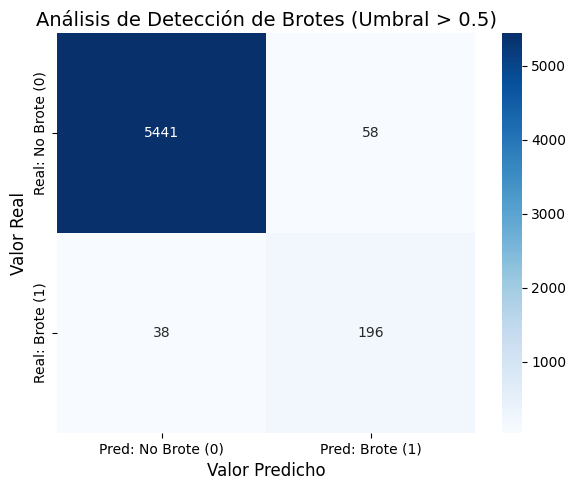

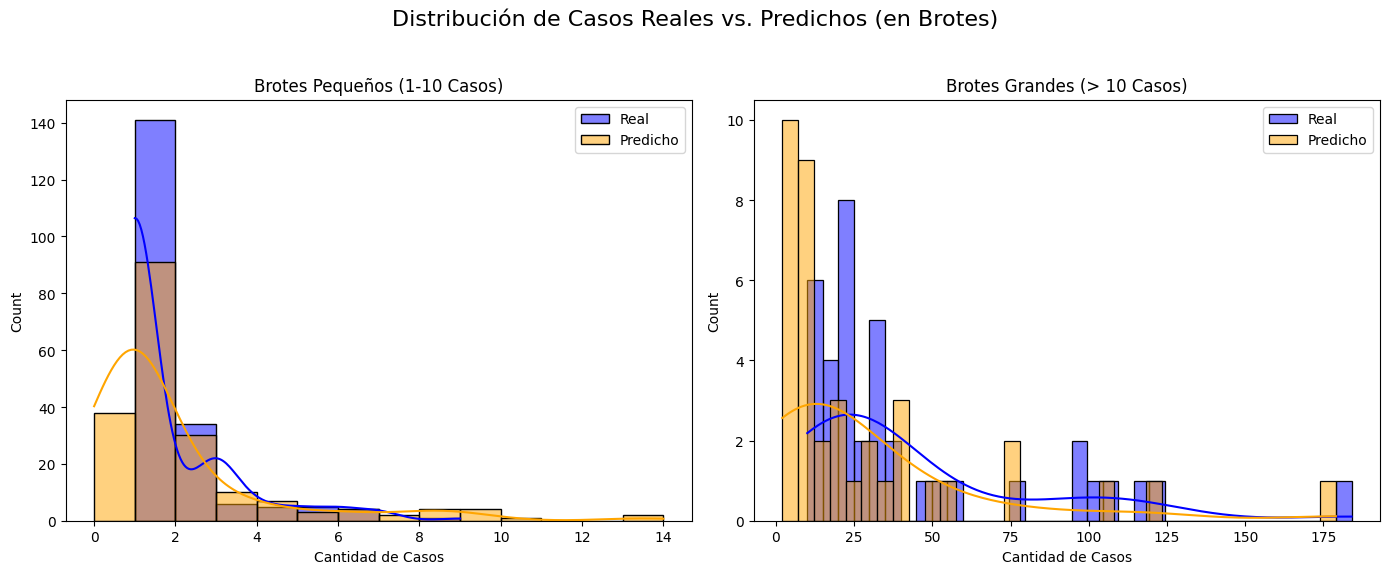

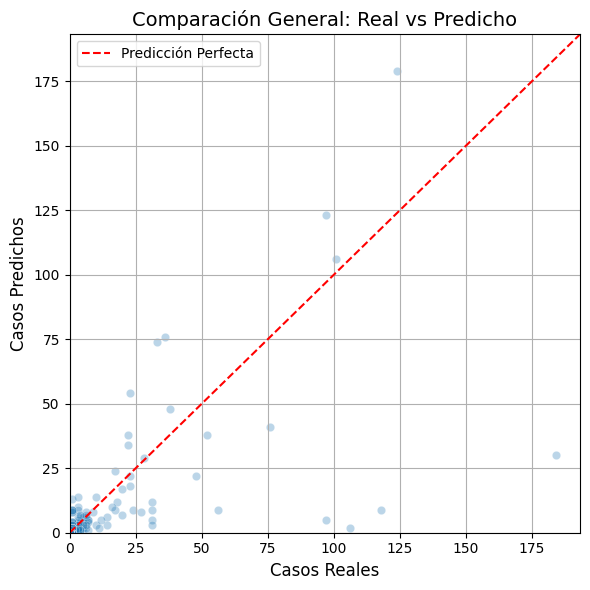

In [31]:
# Clip para evitar valores negativos
predicciones['Casos_Predichos'] = predicciones['Casos_Predichos'].clip(lower=0)

# Variables binarias de brote (umbral de 0.5 para la predicción)
predicciones['Real_Brote'] = (predicciones['Casos_Reales'] > 0).astype(int)
predicciones['Pred_Brote'] = (predicciones['Casos_Predichos'] > 0.5).astype(int)

# Gráfico de matriz de confusión 
plt.figure(figsize=(6, 5))

# Calculamos la matriz de confusión
cm = confusion_matrix(predicciones['Real_Brote'], predicciones['Pred_Brote'])

# Creamos un DataFrame para las etiquetas
cm_df = pd.DataFrame(cm, 
                     index=['Real: No Brote (0)', 'Real: Brote (1)'], 
                     columns=['Pred: No Brote (0)', 'Pred: Brote (1)'])

sns.heatmap(cm_df, 
            annot=True,     
            fmt='g',        
            cmap='Blues')   

plt.title('Análisis de Detección de Brotes (Umbral > 0.5)', fontsize=14)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Predicho', fontsize=12)
plt.tight_layout()
plt.savefig('grafico_1_heatmap_confusion.png')
plt.show()


# Comparación de Distribuciones (pocos vs. muchos casos) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle('Distribución de Casos Reales vs. Predichos (en Brotes)', fontsize=16)

df_pocos_casos = predicciones[(predicciones['Casos_Reales'] > 0) & (predicciones['Casos_Reales'] <= 10)]
if not df_pocos_casos.empty:
    sns.histplot(df_pocos_casos['Casos_Reales'], color='blue', label='Real', kde=True, binwidth=1, ax=ax1)
    sns.histplot(df_pocos_casos['Casos_Predichos'], color='orange', label='Predicho', kde=True, binwidth=1, ax=ax1)
    ax1.set_title('Brotes Pequeños (1-10 Casos)')
    ax1.set_xlabel('Cantidad de Casos')
    ax1.legend()
else:
    ax1.set_title('No hay "Pocos Casos" para mostrar')

df_muchos_casos = predicciones[predicciones['Casos_Reales'] > 10]
if not df_muchos_casos.empty:
    sns.histplot(df_muchos_casos['Casos_Reales'], color='blue', label='Real', kde=True, binwidth=5, ax=ax2)
    sns.histplot(df_muchos_casos['Casos_Predichos'], color='orange', label='Predicho', kde=True, binwidth=5, ax=ax2)
    ax2.set_title('Brotes Grandes (> 10 Casos)')
    ax2.set_xlabel('Cantidad de Casos')
    ax2.legend()
else:
    ax2.set_title('No hay "Muchos Casos" para mostrar')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('grafico_2_distribuciones.png')
plt.show()


# Gráfico de Dispersión (Scatter Plot) 

plt.figure(figsize=(6, 6))

sns.scatterplot(x='Casos_Reales', y='Casos_Predichos', data=predicciones, alpha=0.3)

max_val = max(predicciones['Casos_Reales'].max(), predicciones['Casos_Predichos'].max())
max_val = max_val * 1.05 

plt.plot([0, max_val], [0, max_val], 'r--', label='Predicción Perfecta') 

plt.xlim(0, max_val)
plt.ylim(0, max_val)

plt.xlabel('Casos Reales', fontsize=12)
plt.ylabel('Casos Predichos', fontsize=12)
plt.title('Comparación General: Real vs Predicho', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_3_scatterplot.png')
plt.show()

Podemos ver de forma mas detallada como predice nuestro modelo:
- Primer grafico, una matriz de confusion, muestra como predice si hay o no casos nuestro modelo
- Segundo y tercer grafico, muestran la distribucion de casos reales vs predichos cuando hay muchos o pocos casos. Podemos ver que cuando hay pocos casos predice muy bien, pero cuando tiene que predecir muchos falla bastante, es la debilidad del modelo, sabe que es un brote mas grande pero lo subestima.
- En el Scatter Plot podemos ver mejor esta tendencia de subestimar la magnitud de los brotes.

En sintesis, podriamos decir que nuestro modelo funciona muy bien prediciendo si va a haber o no un contagio y la magnitud de brotes pequeños, pero falla a la hora de predecir la magnitud de un brote grande, tendiendo a subestimarlo.

En el desarrollo del modelo probamos muchimas opciones para mejorar su rendimiento. Voy a nombrar algunas de las opciones que funcionaron o no:
- Division de datos: Al primero se dividio los datos de forma aleatoria, lo que genero un modelo con muy desestabilizado, ademas, existia la posibildiad de que el modelo estuviera haciendo "trampa", ya que al tratarse de una serie temporal, el modelo podria estar viendo el futuro. Para solucionar esto, se implemento una division temporal, usando como entrenamiento el año 2018 al 2023, 2024 como validacion y 2025 como test. Esto logro estabilizar el modelo pero seguia teniendo un error altisimo, ya que habia otro problema, al modelo le costaba mucho predecir el set de validacion ya que se trataba de un año atipico por la epidemia de dengue que hubo en Argentina, lo que tambien privaba al modelo del entrenamiento con grandes brotes. Esto se soluciono cambiando el año de validacion al 2023, un año mas "normal", y el 2024 paso a formar parte del entrenamiento. Esto trajo una mejora significativa al modelo.
- Lags en casos: Esto mejoro enormemente el modelo, pero tambien trajo muchos problemas ¿Porque? El objetivo era añadir 4 semanas de retraso en los casos, asi el modelo podia ver la tendencia del brote, sin embargo, no todas las semanas tienen casos, y por ende estas no estaban en el dataset. La solucion fue rellenar el set de datos con las semanas faltantes, esto dio como resultado un dataset con mas del 70% de filas con 0 casos, lo cual desestabilizo muchisimo al modelo y le enseño a predecir 0. Aun asi, los lags en los casos son una feature que ayuda enormemente en la prediccion, ademas que permitieron al modelo la posibilidad de predecir si hay o no contagio.
- Ponderar casos: Esto fue un gran acierto buscando solucionar el problema de los 0. Consistio en darle pesos a los casos, "forzando" al modelo en este caso de predecirlos.
- Predecir logaritmo: Transformar la variable objetivo a logaritmo, ayudo al modelo a manejar la escala de casos, en especial en años con grandes brotes donde los casos podrian variar enormemente.
- Escalar datos: Ayudo a manejar la diferencia de escalas de las features.
- Estacionalidad: Creamos semana_sin y semana_cos para representar la estacionalidad, lo que le daba informacion valiosisima al modelo, el cual ahora podia distinguir de verano e invierno por ejemplo (cosa que antes no podia, por ejemplo, para el modelo la semana 52 era completamente opuesta a la 1, cuando en realidad son vecinas).
- Tambien se crearon otras variables para brindarle informacion al modelo como promedios de los lags climaticos y de casos.
- Por ultimo, se opto por utilizar keras_tuner para la busqueda de hiperparametros. 

Algunas pruebas que no funcionaron son:
- Creacion de features: Algunas features como tasa_incidencia o promedio_contagios aportaban ruido al modelo empeorando su desempeño.
- LSTM: Se probo una red neuronal LSTM pero no logro aportar nada significativo.
- Doble modelo: Se probo el uso de un modelo doble, un predictor de clase (si habia o no contagio) y un predictor que estimara un numero de casos. Esto le aportaba complejidad al modelo y no sumaba.
- Diversos tipos de ponderacion para tratar los 0.

Concluyendo, fue un desarrollo bastante complicado, sin embargo se llego a un resultado medianamente satisfactorio. Creemos que la dificultad del modelo a la hora de predecir brotes grandes se debe a la falta de datos, contando al final con alrededor del 15% de los datos disponibles.